In [12]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from scipy.stats import beta

In [13]:
referrals = pd.read_csv('../../Welcome-Centre-DataCorps-Data/referrals.csv')

/Users/jamesgin/.virtualenvs/datasine/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2683: DtypeWarning: Columns (44,46,47,51) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
referrals['ReferralTakenDate'] = pd.to_datetime(referrals['ReferralTakenDate'])

In [15]:
days_active = (referrals['ReferralTakenDate'].max() - referrals.groupby('ClientId')['ReferralTakenDate'].min()).dt.days + 7

In [21]:
def get_score(referrals, break_length=28, break_coefficient=1, min_beta_fit_days=365):
    gaps = (referrals.sort_values('ReferralTakenDate').groupby('ClientId')['ReferralTakenDate'].diff().dt.days > break_length).groupby(referrals['ClientId']).sum()
    days_active = (referrals['ReferralTakenDate'].max() - referrals.groupby('ClientId')['ReferralTakenDate'].min()).dt.days + 7
    weeks_active = days_active / 7
    referrals = (referrals.groupby('ClientId').size())
    simple_ratio = (referrals - gaps) / weeks_active
    a, b, loc, scale = beta.fit((simple_ratio[days_active > min_beta_fit_days]).values)
    adjusted_ratio = ((referrals - gaps * break_coefficient + a) / (weeks_active + a + b)).sort_values()
    score_df = pd.concat([referrals, gaps, weeks_active, simple_ratio, adjusted_ratio], axis=1)
    score_df.columns=['Referrals', 'Gaps', 'Weeks Active', 'Simple Ratio', 'Empirical Bayes Ratio']
    return score_df.sort_values('Empirical Bayes Ratio')

In [22]:
get_score(referrals)

/Users/jamesgin/.virtualenvs/datasine/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:412: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/Users/jamesgin/.virtualenvs/datasine/lib/python3.5/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


,Referrals,Gaps,Weeks Active,Simple Ratio,Empirical Bayes Ratio
ClientId,,,,,
419,3,2.0,217.857143,0.004590,0.005300
138,2,1.0,217.857143,0.004590,0.005300
143,2,1.0,217.857143,0.004590,0.005300
336,2,1.0,217.857143,0.004590,0.005300
1056,5,4.0,217.857143,0.004590,0.005300
410,3,2.0,217.857143,0.004590,0.005300
461,1,0.0,217.857143,0.004590,0.005300
562,8,7.0,217.857143,0.004590,0.005300
933,4,3.0,217.857143,0.004590,0.005300


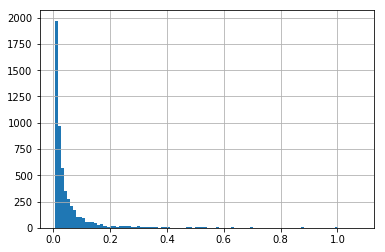

In [13]:
simple_ratio = ((referrals.groupby('ClientId').size()) / (days_active / 7))
simple_ratio[simple_ratio < np.inf].hist(bins=100)

In [6]:
from scipy.stats import beta

In [7]:
beta.fit((simple_ratio[days_active > 365]).values)

/Users/jamesgin/.virtualenvs/datasine/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:412: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/Users/jamesgin/.virtualenvs/datasine/lib/python3.5/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


(0.62793143715979771,
 950.0625965965985,
 -2.2106289025932894e-28,
 10.374297748073433)

In [8]:
adjusted_ratio = ((referrals.groupby('ClientId').size() - 1 + 0.6279) / ((days_active / 7) + 950)).sort_values()

In [9]:
df = pd.concat([referrals.groupby('ClientId').size(), days_active / 7, simple_ratio, adjusted_ratio], axis=1)
df.columns=['count', 'weeks available', 'simple ratio', 'bayes ratio']
df.to_csv('test_ranking.csv')

In [12]:
df.sort_values('bayes ratio')

,count,weeks available,simple ratio,bayes ratio
ClientId,,,,
461,1,217.857143,0.000000,0.000538
603,1,217.857143,0.000000,0.000538
228,1,217.714286,0.000000,0.000538
51,1,217.714286,0.000000,0.000538
721,1,217.714286,0.000000,0.000538
939,1,217.714286,0.000000,0.000538
781,1,217.714286,0.000000,0.000538
841,1,217.714286,0.000000,0.000538
540,1,171.714286,0.000000,0.000560


In [10]:
test = referrals[referrals['ClientId'] == 2890].sort_values('ReferralTakenDate')
test

,ReferralInstanceId,StatusId,ReferralOnHold,ReferralTakenDate,ReferralReadyDate,ReferralCollectedDate,ReferralWorkerID,ReferralPreparedWorkerId,ReferralHandedWorkerId,ClientId,...,ReferralDietaryRequirements_Diabetic,ReferralDietaryRequirements_Gluten Intolerant/coeliac,ReferralDietaryRequirements_Halal,ReferralDietaryRequirements_No Pork,ReferralDietaryRequirements_Nut Allergy,ReferralDietaryRequirements_Other Dietary Requirement,ReferralDietaryRequirements_Vegan,ReferralDietaryRequirements_Vegetarian,ReferralDietaryRequirements_lactose intolerent,ReferralDietaryRequirements_pregnancy
3917,3865,3,0,2014-09-02 10:37:00,09/02/14 16:48:00,09/02/14 16:48:00,5,1.0,1.0,2890,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5741,5555,3,0,2014-12-22 10:26:00,12/22/14 17:28:00,12/22/14 17:28:00,5,1.0,1.0,2890,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5914,5728,3,0,2015-01-06 14:11:00,01/06/15 17:09:00,01/06/15 17:09:00,6,1.0,1.0,2890,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6023,5837,3,0,2015-01-13 14:40:00,01/13/15 16:50:00,01/13/15 16:50:00,1,1.0,1.0,2890,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6135,5949,3,0,2015-01-20 13:05:00,01/20/15 15:58:00,01/20/15 15:58:00,1,1.0,1.0,2890,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6227,6041,3,0,2015-01-27 12:46:00,01/27/15 13:46:00,01/27/15 13:46:00,1,5.0,5.0,2890,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6472,6286,3,0,2015-02-10 15:32:00,02/10/15 15:43:00,02/10/15 15:43:00,5,5.0,5.0,2890,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6662,6476,3,0,2015-02-24 12:57:00,02/24/15 14:14:00,02/24/15 14:14:00,5,5.0,5.0,2890,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6774,6588,3,0,2015-03-03 13:03:00,03/03/15 14:22:00,03/03/15 14:22:00,5,5.0,5.0,2890,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6868,6682,3,0,2015-03-10 12:55:00,03/10/15 13:58:00,03/10/15 13:58:00,6,5.0,5.0,2890,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
rest_days = 28
days = (test['ReferralTakenDate'] - test['ReferralTakenDate'].min()).dt.days
days.diff()

In [ ]:
def get_burst_number(group, rest_days):
    days = (group['ReferralTakenDate'] - group['ReferralTakenDate'].min()).dt.days
    same_burst = (days.diff() < rest_days)
    burst_number = (((same_burst != same_burst.shift(1)) & ~same_burst) | ~same_burst).cumsum()
    return burst_number

In [ ]:
def add_burst_numbers(referrals, rest_days=28):
    referrals = referrals.sort_values('ReferralTakenDate')
    burst_number = referrals.groupby(referrals['ClientId']).apply(get_burst_number, rest_days)
#     return burst_number
    referrals['burst_number'] = burst_number.reset_index().set_index('level_1')['ReferralTakenDate']
    return referrals

In [ ]:
burst_number = add_burst_numbers(referrals,28)

In [ ]:
burst_number[referrals['ClientId'] == 594]['burst_number']

In [ ]:
burst_number.to_csv('with_burst_number.csv')

In [ ]:
burst_number.groupby(['ClientId', 'burst_number']).size().reset_index().groupby(['ClientId']).size().idxmax()